In [1]:
# Import necessary packages here
import numpy as np              
import matplotlib.pyplot as plt  
import pandas as pd
from datetime import datetime 
import matplotlib.dates as mdates

Investigating Narrabeen’s coastal morphodynamics relative to wave direction	

Arden Lichter 

OCEAN 215 Final Project  
Autumn 2024

## Introduction 

As the world’s climate and sea levels undergo shifts, it is crucial now more than ever that we protect future coastal communities and their shorelines. Recognizing patterns of erosion and accretion is vital for managing coastal environments amidst both long-term basin-scale changes and short-term storm events. Understanding coastal vulnerability linked to the El Nino/Southern Oscillation (ENSO) system requires acknowledging the interplay between beach morphology and ENSO dynamics. This report examines the coastal dynamics of Narrabeen Beach in New South Wales (NSW), Australia, over a 40-year period, to investigate the scientific question on how storm-driven waves impact coastal bathymetry, specifically morphological changes like erosion and accretion, compared to typical wave patterns. It also explores how different phases of ENSO, such as La Niña and El Niño, affect the NSW coastline.

Narrabeen beach is characterized by its east orientation, a southern headland, a lagoon backing the northern half of the barrier, and a lengthy 3-kilometer coastline (Turner et al. 2016). The beach is primarily impacted by waves from the southeast, averaging 1.62 meters in height and arriving from approximately 135 degrees, which drives northward alongshore sediment transport (Mortlock et al., 2017). One of the most famous and damaging storms for the NSW coastline occurred in June 2016. While wave height did not significantly differ, Narrabeen suffered their severest erosion in the past 40 years (Mortlock et al. 2017). Therefore, my hypothesis is that storms producing waves from unusual directions, outside the dominant southeast flow, will cause significant erosion, due to the beach's natural embayment geometry and varying sediment budget. 

By analyzing shoreline data spanning a decade, this study aims to identify trends in beach behavior and recovery, with a focus on the impacts of ENSO phases, storm events, and regular wave patterns. These insights hope to enhance climate models, providing better predictions for coastal management and increase our ability to protect future coastlines worldwide.




## Data sources: 
- Sydney OffShore Wave data (Dataset 1):
- Downloaded from Manly Hydraulics Lab on 11/03/2024 
- Data collected from Buoy SYDDOW which is at position 151°26′E, 33°48′S (spatial is a single point) 
- Relevant variables include Hsig (m) (wave significant height) and WDIR_BUOY (deg TN) (Buoy direction)
- Regional: New South Wales, specifically Narrabeen-Collaroyy Beach, with profiles 1 (North Narrabeen), profile 4(Center Narrabeen), profile 8 (South Narrabeen)
- Temporal: January 15th, 1979 to now (continuously updated)
- Resolution: hourly collcetion
- No diffuculties obtaining the dataset
- url to dataset: https://mhl.nsw.gov.au/Station-SYDDOW


- Narrabeen's Cross-Shoreline Change at 3 Profiles (North, Center, and South) (Dataset 2): 
- Downloaded from CoastSat WebGIS, specifically the Narrabeen-Collary region on 11/03/2024 
- Data collected from 3 Profiles: Profile 1 (North Narrabeen - aus0206-0003), Profile 4 (Center Narrabeen - aus0206-0015), and Profile 8 (South Narrabeen - aus0206-0034)
- Relevant variable was Shoreline position (m)
- Regional: New South Wales, specifically Narrabeen-Collaroyy Beach, with profiles 1 (North Narrabeen), profile 4(Center Narrabeen), profile 8 (South Narrabeen)
- Spatial: 3 profiles along the same beach 
- Temporal: May 22nd, 1987 to now (continuously updated) 
- Resolution: near-monthly collection
- No diffuculties obtaining the dataset
- url to dataset: (PF1) http://coastsat.wrl.unsw.edu.au/time-series/aus0206-0003/ , (PF4) http://coastsat.wrl.unsw.edu.au/time-series/aus0206-0015/ , (PF8) http://coastsat.wrl.unsw.edu.au/time-series/aus0206-0034/ 


- NOAA’s bi-monthly Multivariate El Nino/Southern Oscillation (ENSO) index (MEI.v2) (Dateset 3):
- Downloaded from NOAA's Physical Sciences Laboratory on 11/03/2024
- Data collected uses the MEI index which combines both oceanic and atmospheric variables into a single index an assessment of ENSO: Positive MEI values indicate El Nino, while negative MEI values indicate La Nina.
- Relevant variable is MEI.v2 
- Spatial - dataset is a time-varying index of the tropical Pacific basin at 30°S-30°N and 100°E-70°W
- Temporal: Jan 15, 1987 to now (continuously updated)
- Resolution: near-monthly collection
- url to dataset: https://psl.noaa.gov/enso/mei/


## 1. Analyzing Narrabeen's Offshore Wave Data 

I will use Sydney's offshore wave data from Manly Hydraulics laboratory to look at how wave height and direction differs for each storm, June 2016 and April 2015, and to the 40 year average to determine how Narrabeen’s coastal morphology changes to these variables. I want viewers to be able to see a clear difference in June 2016 compared to April 2015 in how Narrabeen reacted. I selected this specific offshore wave buoy data because of its central location along the NSW coastline, at coordinates 151°26′E, 33°48′S.

I will create a figure with two subplots stacked vertically, both sharing the same x-axis, which covers a three-week period before and after the June 3–10, 2016 storm. The top subplot shows significant wave height, which is an average of the largest ⅓ of waves, to highlight the increase in wave height during the storm. More importantly, the bottom subplot focuses on wave direction, which deviated significantly from the storm.

To further support my analysis, I used Python to calculate and display several key averages: Sydney's 40-year average significant wave height, maximum wave height, and wave direction, the 2016 storm’s average significant wave height, maximum wave height, and wave direction, and the 2015 storm’s average significant wave height, maximum wave height, and wave direction.

In [2]:
# read the CSV file
wave_file = pd.read_csv("Sydney_Offshore_Waves_.csv")

#strips any extra spaces from the column "Date/Time" as there were hidden characters/spaces that I couldn't see, which was preventing python from converting to datetime
wave_file.columns = wave_file.columns.str.strip()

# converts 'Date/Time' column to datetime
wave_file['Date/Time'] = pd.to_datetime(wave_file['Date/Time'], format='%m/%d/%y %H:%M')

# set the 'Date/Time' column as the index to make graphing easier=
wave_file.set_index('Date/Time', inplace=True)

# some of my numbers were mixed with strings so I had to make sure that my columns were numeric so that python could use it for graphing 
#I also used coerce to make any invalid parsing to NaN (https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html)
wave_file['Hsig (m)'] = pd.to_numeric(wave_file['Hsig (m)'])
wave_file['Hmax (m)'] = pd.to_numeric(wave_file['Hmax (m)'])
wave_file['WDIR_BUOY (deg TN)'] = pd.to_numeric(wave_file['WDIR_BUOY (deg TN)'], errors='coerce') 


/tmp/ipykernel_130/1137568313.py:2: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  wave_file = pd.read_csv("Sydney_Offshore_Waves_.csv")


In [3]:
#data cleaning 

#select the two relevant columns I want to work with
waved_selected = wave_file[['Hsig (m)', 'Hmax (m)', 'WDIR_BUOY (deg TN)']]

# define the start and end dates for filtering
start_date = '2016-05-15'
end_date = '2016-07-01'

# resample the data by day and calculate the mean
waved_average = waved_selected.resample('D').mean()

# filter the data between start_date and end_date so that python only graphs values between these dates
waved_filtered = waved_average.loc[start_date:end_date]


In [4]:
# define the start and end dates for the 40-year period
start_date_40_years = '1980-01-01'
end_date_40_years = '2020-12-31'

# filter the data between the start and end dates for the 40-year period
waved_40_years = waved_selected.loc[start_date_40_years:end_date_40_years]

# resample the data by day and calculate the mean for the 40-year period
waved_40_years_average = waved_40_years.resample('D').mean()

# calculate the 40-year average for significant wave height and wave direction
mean_Hsig_40_years = waved_40_years_average['Hsig (m)'].mean()
mean_WDIR_40_years = waved_40_years_average['WDIR_BUOY (deg TN)'].mean()
mean_Hmax_40_years = waved_40_years_average['Hmax (m)'].mean()

# define the start and end dates of the main part of the 2016 storm 
start_date_waves = '2016-06-04'
end_date_waves = '2016-06-06'

# filter the data between the start and end dates of the 2016 storm
waved_storm = waved_selected.loc[start_date_waves:end_date_waves]
max2016 = waved_storm['Hmax (m)'].max()

# resample the data by day and calculate the mean of the 2016 storm
waved_storm_average = waved_storm.resample('D').mean()

# calculate the 2016 storm's significant wave height and wave direction
mean_Hsig_storm = waved_storm_average['Hsig (m)'].mean()
mean_WDIR_storm = waved_storm_average['WDIR_BUOY (deg TN)'].mean()
mean_Hmax_storm = waved_storm_average['Hmax (m)'].mean()

# define the start and end dates of the main part of the 2015 storm 
start_date_2015 = '2015-05-22'
end_date_2015 = '2015-05-24'

# filter the data between the start and end dates of the 2015 storm
waved_2015 = waved_selected.loc[start_date_2015:end_date_2015]
max2015 = waved_2015['Hmax (m)'].max()

# resample the data by day and calculate the mean of the 2015 storm
waved_2015_average = waved_2015.resample('D').mean()

# calculate the 2015 storm's significant wave height and wave direction
mean_Hsig_2015 = waved_2015_average['Hsig (m)'].mean()
mean_WDIR_2015 = waved_2015_average['WDIR_BUOY (deg TN)'].mean()
mean_Hmax_2015 = waved_2015_average['Hmax (m)'].mean()

# print the averages
print("The 40-Year average significant wave height was", mean_Hsig_40_years, "meters.")
print("The 40-Year average maximum wave height was", mean_Hmax_40_years, "meters.")
print("The 40-Year average wave direction was", mean_WDIR_40_years, "degrees.")

print("The 2016 storm's average significant wave height was", mean_Hsig_storm, "meters.")
print("The 2016 storm's average maximum wave height was", mean_Hmax_storm, "meters.")
print("The 2016 storm's average wave direction was", mean_WDIR_storm, "degrees.")
print("The 2016 storm maximum wave height was", max2016, "meters.")

print("The 2015 storm's average significant wave height was", mean_Hsig_2015, "meters.")
print("The 2015 storm's average maximum wave height was", mean_Hmax_2015, "meters.")
print("The 2015 storm's average wave direction was", mean_WDIR_2015, "degrees.")
print("The 2015 storm maximum wave height was", max2015, "meters.")

The 40-Year average significant wave height was 1.6240155644926884 meters.
The 40-Year average maximum wave height was 2.802939456921888 meters.
The 40-Year average wave direction was 135.1679719723626 degrees.
The 2016 storm's average significant wave height was 3.992194444444444 meters.
The 2016 storm's average maximum wave height was 6.748472222222222 meters.
The 2016 storm's average wave direction was 101.93075684380032 degrees.
The 2016 storm maximum wave height was 12.01 meters.
The 2015 storm's average significant wave height was 3.215119565217391 meters.
The 2015 storm's average maximum wave height was 5.676932367149758 meters.
The 2015 storm's average wave direction was 164.56642512077295 degrees.
The 2015 storm maximum wave height was 10.91 meters.


My biggest issue was trying to get my columns to print, and so it turns out that some of my numbers were mixed with strings so I had to convert them to columns numeric so that python could read it. I also had to used coerce to make any invalid parsing to NaN. 

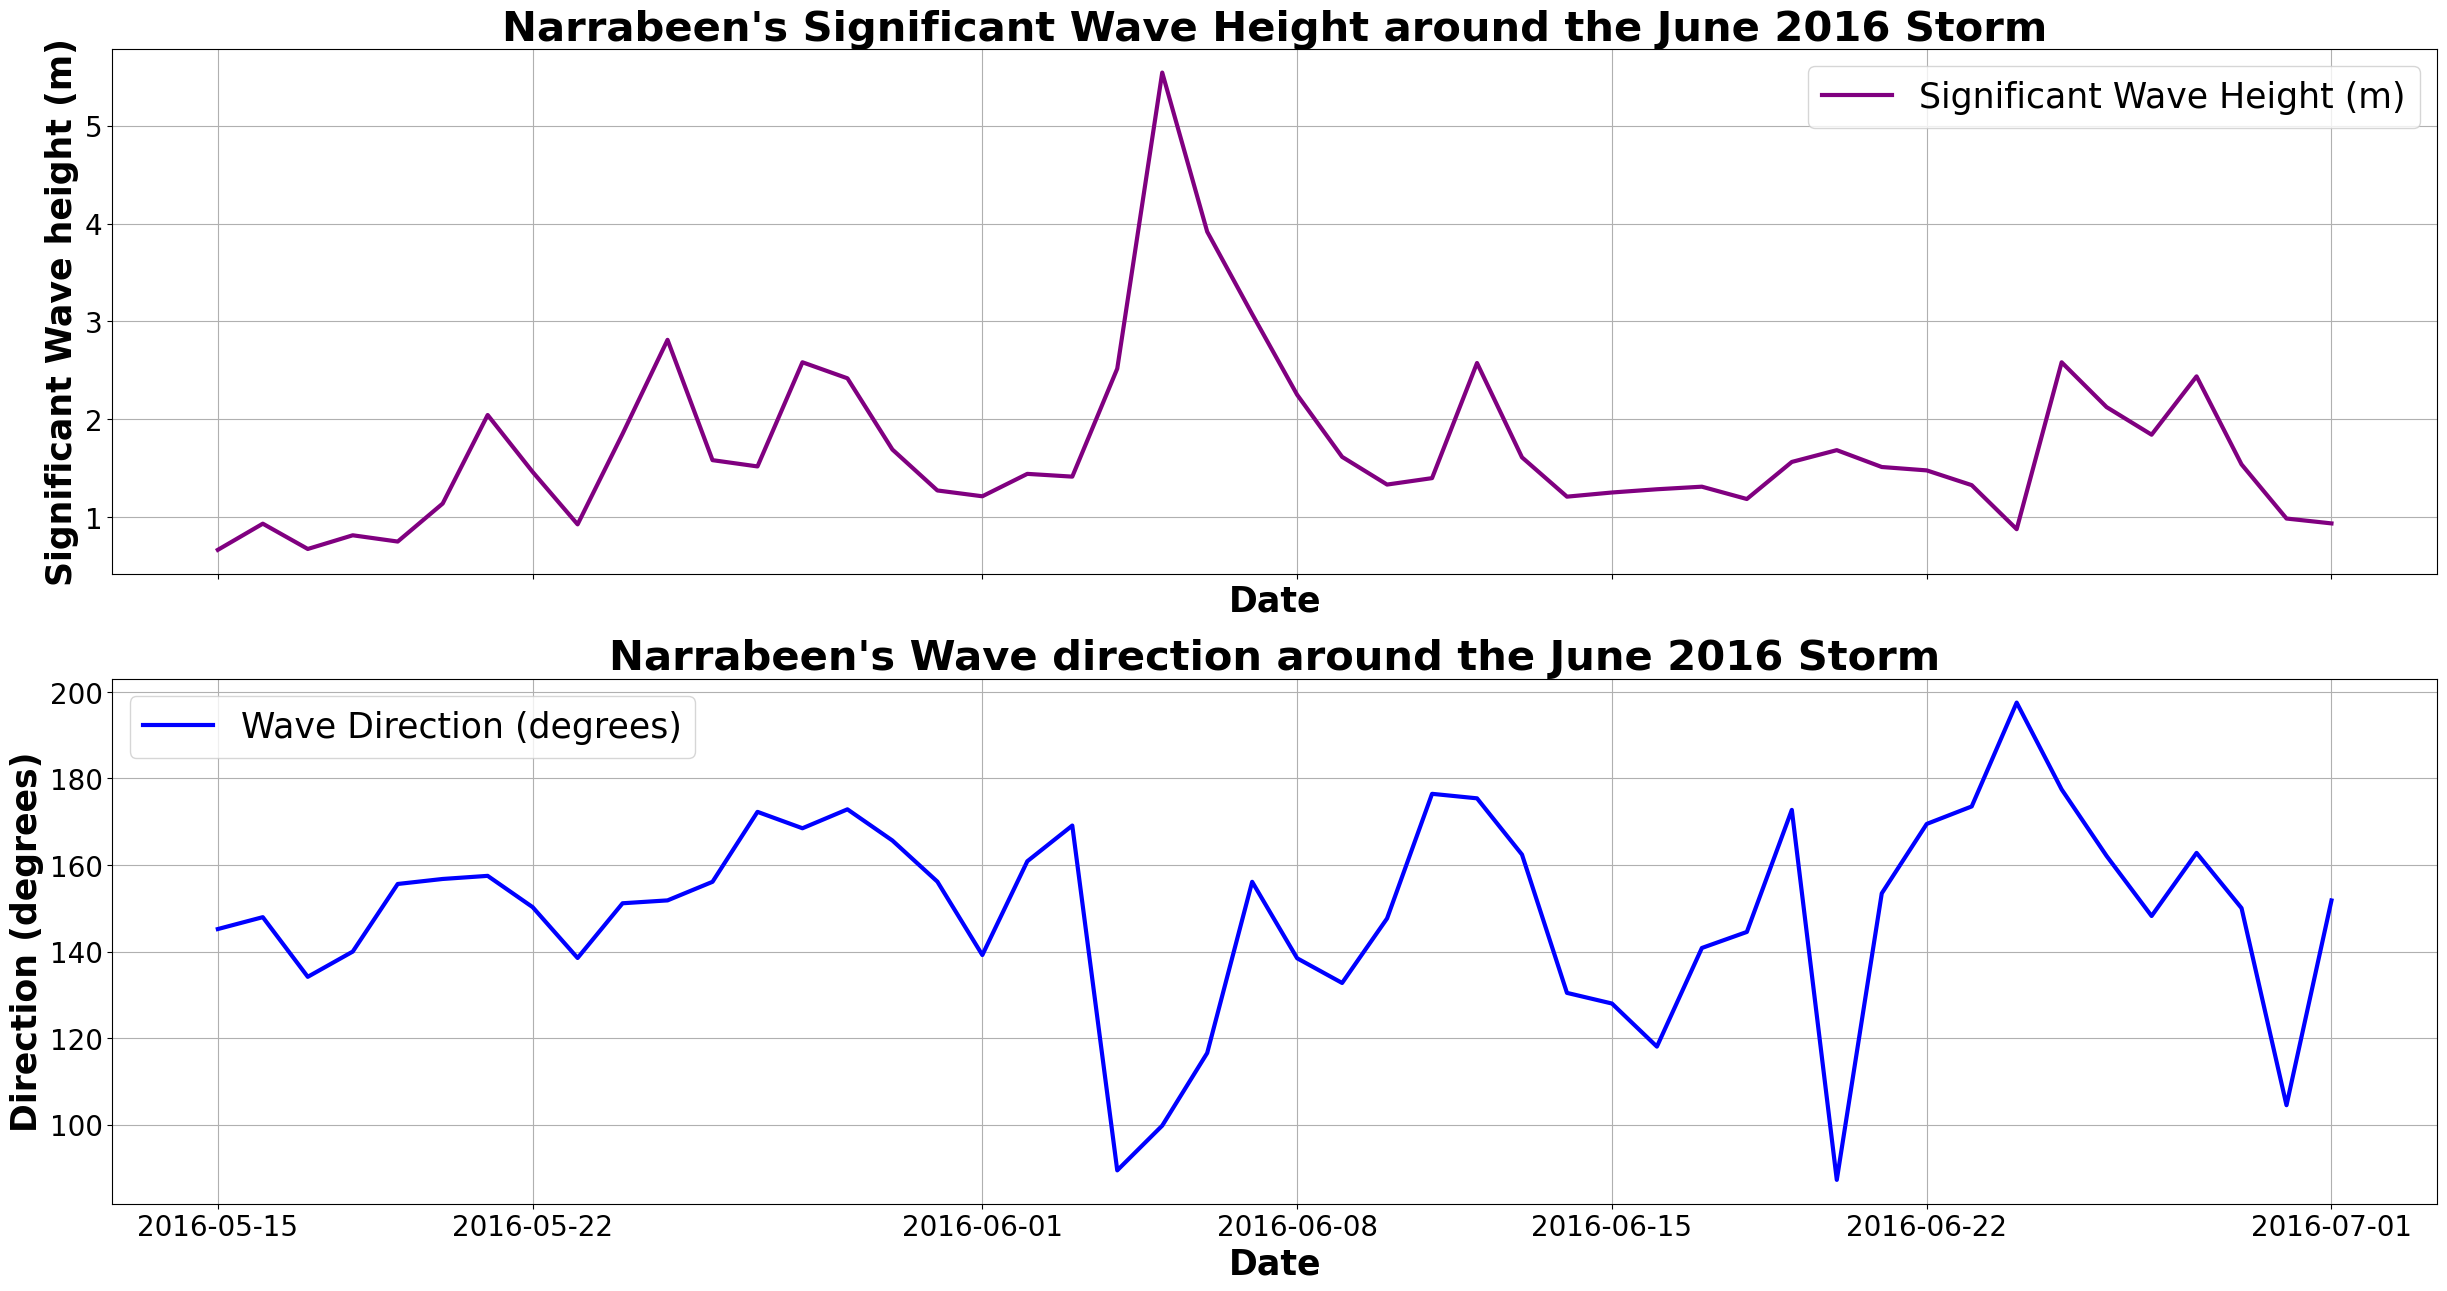

In [5]:
#Make and display the first figure - plotting significant wave height and wave direction around the June 2016 storm 

fig, axs = plt.subplots(2, 1, figsize=(30, 15), sharex = True) #creates 2 blank stacked subplots that share the same x axis scale of time

#creates first subplot on the top by specifying which position (0):  
axs[0].plot(waved_filtered.index, waved_filtered["Hsig (m)"], color="purple", linestyle = '-', lw=3, label="Significant Wave Height (m)") #graphs x,y in purple with a label of Sig wave height
axs[0].set_xlabel("Date", fontsize=25,  fontweight="bold") #sets x axis title 
axs[0].set_ylabel("Significant Wave height (m)", fontsize=25,  fontweight="bold")#sets y axis title
axs[0].set_title("Narrabeen's Significant Wave Height around the June 2016 Storm", fontsize = 30,  fontweight="bold")#sets title
axs[0].legend(fontsize=25) #add legend 
axs[0].grid() #add grid
axs[0].tick_params("x", labelsize = 20) #makes the x-axis ticks be a larger size
axs[0].tick_params("y", labelsize = 20)  #makes the y-axis ticks be a larger size

#creates second subplot on the bottom by specifying which position (1):  
axs[1].plot(waved_filtered.index, waved_filtered["WDIR_BUOY (deg TN)"], color="blue", linestyle = '-', lw=3, label= "Wave Direction (degrees)") #graphs x,y in blue with a label of wave direction
axs[1].set_xlabel("Date", fontsize=25,  fontweight="bold") #sets x axis title 
axs[1].set_ylabel("Direction (degrees)", fontsize=25,  fontweight="bold")#sets y axis title
axs[1].set_title("Narrabeen's Wave direction around the June 2016 Storm", fontsize = 30,  fontweight="bold")#sets title
axs[1].legend(fontsize=25) #add legend 
axs[1].grid() #add grid
axs[1].tick_params("x", labelsize = 20) #makes the x-axis ticks be a larger size
axs[1].tick_params("y", labelsize = 20)  #makes the y-axis ticks be a larger size


<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
Figure 1: Sydney offshore Waverider buoy data (obtained from Manly Hydraulics Laboratory) recorded from May 15  to July 1st, 2016. (Top) Depiction of significant wave height in meters. (Bottom) Depiction of wave direction in degrees with the North direction represented by 0 degrees, East as 90 degrees, South as 180 degrees, and West as 270 degrees. 

This figure helps answer the question of why there was such significant erosion from the June 2016 storm by comparing wave height, maximum height, and direction for the June 2016 storm with those of the April 2015 storm and the 40-year average. According to Python outputs, Sydney’s 40-year average wave height is 1.6 meters, with a typical southeast direction of 135 degrees. In contrast, during the 7-day June 2016 storm, wave heights averaged 4.0 meters, with an eastward direction of 101 degrees.

The storm began on June 4th, with a peak on June 5th at 3 pm, when the largest waves reached 12 meters. Following this peak, consistently large waves (above the 3-meter storm threshold) persisted for an additional 36 hours, until June 7th. These waves primarily came from the east, with directions ranging from 90 to 115 degrees, as shown in the figure.

The comparison with Sydney’s 2015 storm data is also critical. The April 21st–24th storm had an average significant wave height of 3.2 meters, coming from the typical southeast direction of 165 degrees. This storm also reached a peak height of 11 meters, which helps show that the primary difference between these two storms is from the direction of the waves. When paired with the next plot, it suggests that storms with waves approaching from an unusual direction to the coastline cause more significant damage than those with waves coming from the typical direction.


## 2. Analyzing Narrabeen's Beach Profiles - Short Term Change  
<!-- In the introduction below, specify the data set(s) you are working with in this section, which aspect of your research question this section addresses, and the figure you will produce -->

I will use CoastSat, an open-source software toolkit, to obtain near-monthly shoreline data (Vos et al. 2019). This toolkit uses Google Earth Engine and Python to retrieve Landsat and Sentinel-2 satellite images, which undergo a similar data cleaning process of removing outliers, clouds, poor pixels, and tidal influences (Vos et al. 2019). To analyze how the shoreline behavior changes for 2015 vs 2016, I will plot three beach profiles for Narrabeen: PF1 (north), PF4 (center), and PF8 (south). In these plots, zero represents the average shoreline position, positive values indicate accretion, and negative values indicate erosion. These profiles will be used to examine both short-term changes (Figure 2) and long-term trends (Figure 4). To explore short-term changes from the 2016 storm, I will identify the period of greatest erosion at each profile. Additionally, I will compare the beach profiles' behavior before the storm, influenced by southward waves, and their recovery afterward.

In [6]:
# read the CSV file
pf1shoreline_file = pd.read_csv("aus0206-0003.csv", names = ["dates", "shoreline"], index_col=0, parse_dates=True)
pf4shoreline_file=pd.read_csv("aus0206-0015.csv", names = ["dates", "shoreline"], index_col=0, parse_dates=True)
pf8shoreline_file=pd.read_csv("aus0206-0034.csv",  names = ["dates", "shoreline"], index_col=0, parse_dates=True)
#already in datetime index so do not need to convert


In [7]:
#data cleaning 

# define the start and end dates for filtering
start_dateS = '2015-01-01' 
end_dateS = '2017-06-01'

# filter the data between start_date and end_date so that python only graphs values between these dates
pf1 = pf1shoreline_file.loc[start_dateS:end_dateS]
pf4 = pf4shoreline_file.loc[start_dateS:end_dateS]
pf8 = pf8shoreline_file.loc[start_dateS:end_dateS]

#Manipulate the date to get Cross-shore change (annomaly), by calculating the average coastline position over 3 years for each profile and then taking the shoreline positon at each day minus the average to get the annomaly value

average1 = pf1.mean()
annomaly1 = pf1-average1

average2 = pf4.mean()
annomaly2 = pf4-average2

average3 = pf8.mean()
annomaly3 = pf8-average3




In [8]:
# For Profile 1
lowest_anomaly1 = annomaly1.min()  # Find the lowest anomaly value
lowest_date1 = annomaly1.idxmin()  # Find the date corresponding to the lowest anomaly

# For Profile 4
lowest_anomaly2 = annomaly2.min()  # Find the lowest anomaly value
lowest_date2 = annomaly2.idxmin()  # Find the date corresponding to the lowest anomaly

# For Profile 8
lowest_anomaly3 = annomaly3.min()  # Find the lowest anomaly value
lowest_date3 = annomaly3.idxmin()  # Find the date corresponding to the lowest anomaly

# Step 2: Print the results
print(f"Profile 1: Lowest anomaly is {lowest_anomaly1} on {lowest_date1}")
print(f"Profile 4: Lowest anomaly is {lowest_anomaly2} on {lowest_date2}")
print(f"Profile 8: Lowest anomaly is {lowest_anomaly3} on {lowest_date3}")

Profile 1: Lowest anomaly is shoreline   -31.956522
dtype: float64 on shoreline   2016-06-22 23:43:53
dtype: datetime64[ns]
Profile 4: Lowest anomaly is shoreline   -37.642553
dtype: float64 on shoreline   2016-06-22 23:43:53
dtype: datetime64[ns]
Profile 8: Lowest anomaly is shoreline   -32.144681
dtype: float64 on shoreline   2016-09-02 23:46:24
dtype: datetime64[ns]


My biggest issue was dealing with working with the same code for Figure 2 and Figure 3. Because I kept manipulating the start and end time, I had to make sure that Python didn't confuse the two, which took some time to make sure each line was representing what I wanted for that figure. 

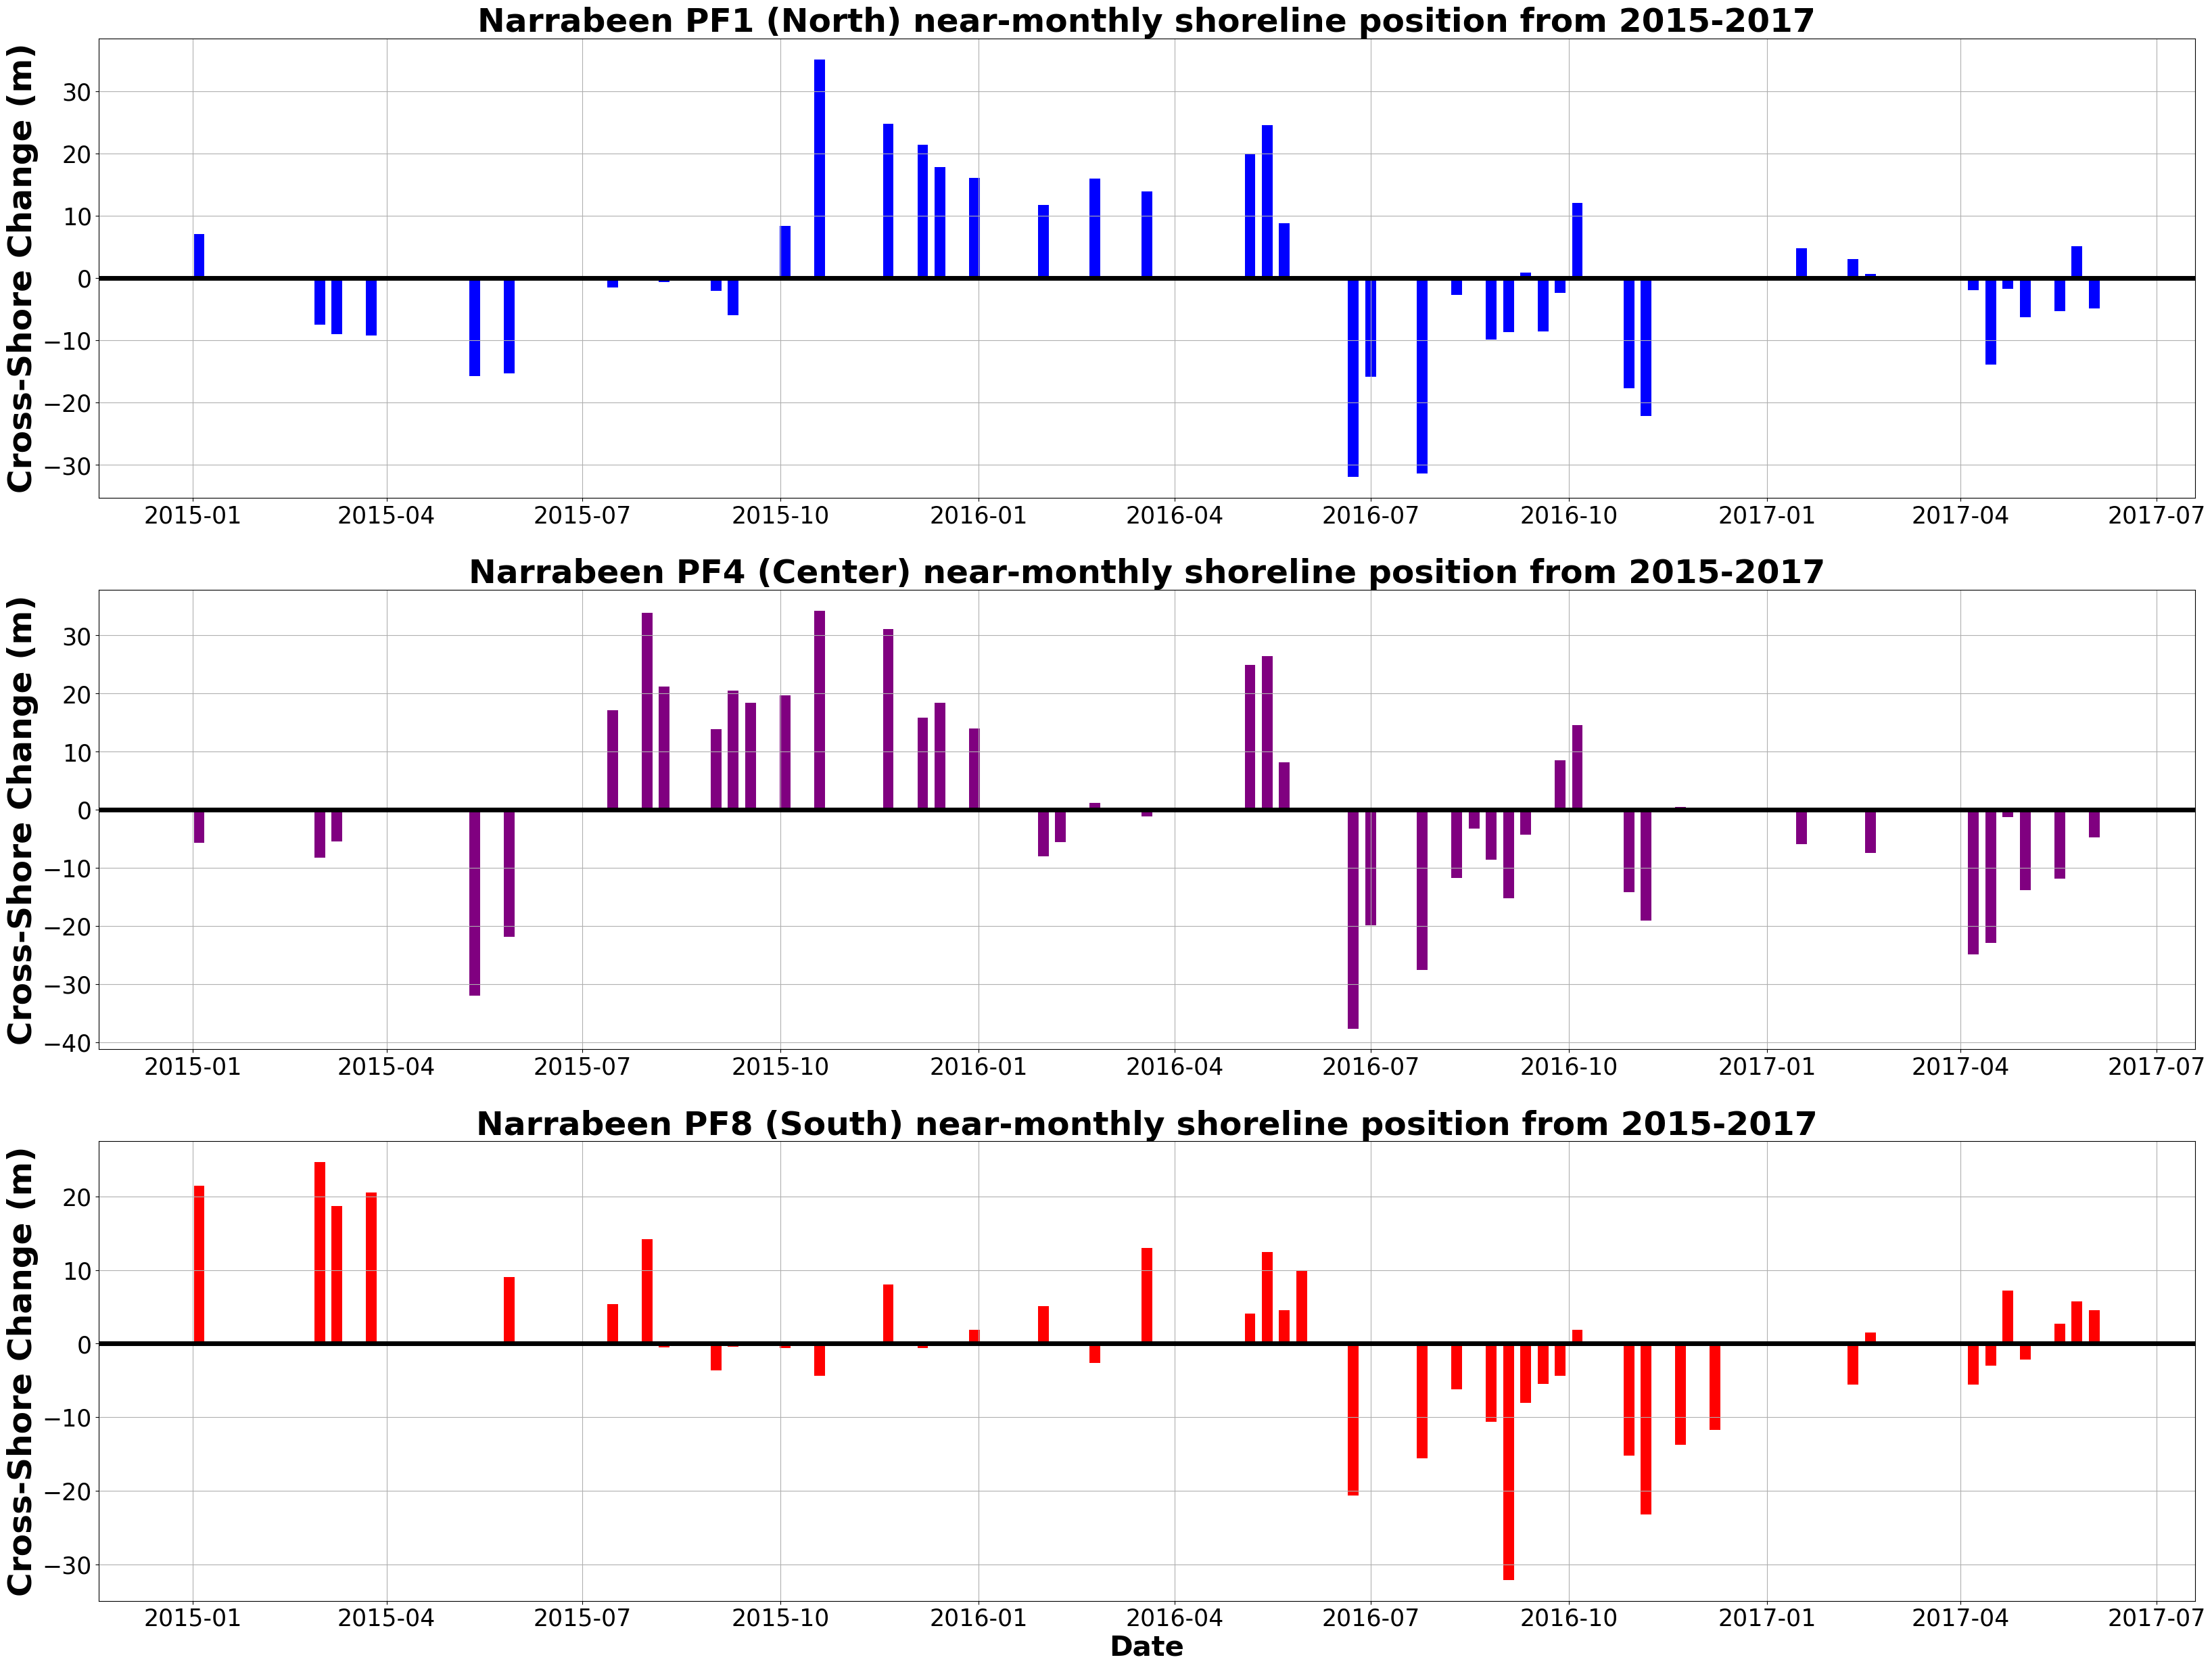

In [15]:
#Make and display the second figure - plotting cross-shore change at each profile over 3 years (2015-2018) 

fig, axs = plt.subplots(3, 1, figsize=(40, 30)) #creates 3 blank stacked subplots
#creates first subplot on the top by specifing which position (0):  
axs[0].bar(annomaly1.index, annomaly1["shoreline"], width=5, color="blue") #creates a bar chart that graphs time on x and cross-shore change on y, with a larger bar width in blue for PF1
axs[0].tick_params("x", labelsize = 25) #makes the x-axis ticks be a larger size
axs[0].tick_params("y", labelsize = 25)  #makes the y-axis ticks be a larger size
axs[0].set_ylabel("Cross-Shore Change (m)", fontsize=35,  fontweight="bold") #sets y label title and size
axs[0].set_title("Narrabeen PF1 (North) near-monthly shoreline position from 2015-2017", fontsize = 35, fontweight="bold") #sets title with size
axs[0].grid() #adds grid lines
axs[0].axhline(y = 0, color = 'black', linestyle = '-', lw=5)  #adds a line at line zero so its easier to see the moving averages

#creates second subplot in the middle by specifying which position (1):  
axs[1].bar(annomaly2.index, annomaly2["shoreline"], width=5, color="purple") #creates a bar chart that graphs time on x and cross-shore change on y, with a larger bar width in blue for PF4
axs[1].tick_params("x", labelsize = 25, color="black") #makes the x-axis ticks be a larger size
axs[1].tick_params("y", labelsize = 25) #makes the y-axis ticks be a larger size
axs[1].set_ylabel("Cross-Shore Change (m)", fontsize=35,  fontweight="bold") #sets y label title and size
axs[1].set_title("Narrabeen PF4 (Center) near-monthly shoreline position from 2015-2017", fontsize = 35,  fontweight="bold") #sets title with size
axs[1].grid() #adds grid lines
axs[1].axhline(y = 0, color = 'black', linestyle = '-', lw=5)  #adds a line at line zero so its easier to see the moving averages

#creates third subplot on the bottom by specifying which position (2):  
axs[2].bar(annomaly3.index, annomaly3["shoreline"], width=5, color="red") #creates a bar chart that graphs time on x and cross-shore change on y, with a larger bar width in blue for PF8
axs[2].tick_params("x", labelsize = 25, color="black") #sets x label title and size
axs[2].set_xlabel("Date", fontsize=30, fontweight="bold") #makes the x-axis ticks be a larger size
axs[2].tick_params("y", labelsize = 25)  #sets y label title and size
axs[2].set_ylabel("Cross-Shore Change (m)", fontsize=35,  fontweight="bold") #makes the y-axis ticks be a larger size
axs[2].set_title("Narrabeen PF8 (South) near-monthly shoreline position from 2015-2017", fontsize = 35,  fontweight="bold") #sets title with size
axs[2].grid() #adds grid lines
axs[2].axhline(y = 0, color = 'black', linestyle = '-', lw=5)  #adds a line at line zero so its easier to see the moving averages


<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Figure 2 Caption:** Individual beach profiles of near-monthly shoreline position at Narrabeen from July 2015 to July 2017 (data sourced from CoastSat).

This figure demonstrates that the unusual eastward storm waves during the 2016 event caused significant erosion at all Narrabeen profiles. The plot shows that the greatest erosion occurred in 2016, rather than 2015, with Profile 1 losing 32 meters and Profile 4 losing 38 meters on June 22. Profile 8 experienced the greatest erosion on September 2nd, losing 32 meters. The April 2015 storm caused minor erosion at the northern and central profiles, which recovered within two months and remained in an overall accreted state until the 2016 storm. The southern profile maintained sediment in 2015 but experienced the severest erosion following the 2016 storm because it continued to worsen through September. The southern profile did not even begin to recover until six months after the 2016 storm, and it took a full year to reach an accreted state again. In contrast, the central and northern profiles recovered within three months and resumed their natural erosion-accretion cycles, which will be discussed in the fourth section. 

## 3. Analyzing how Narrabeen's coastline changes in El Nino vs. La Nina conditions 

<!-- In the introduction below, specify the data set(s) you are working with in this section, which aspect of your research question this section addresses, and the figure you will produce -->

Similar to Figure 2, I will use CoastStat to analyze shoreline changes from 2014 to 2018 at each profile. By plotting the 2.5-year periods before and after the 2016 storm, I plan to investigate patterns of beach erosion and accretion in relation to major El Nino and La Nina events. To do this, I will overlay shoreline change data with NOAA’s bi-monthly Multivariate ENSO Index (MEI.v2) data. A positive MEI value indicates El Nino conditions, while a negative MEI value indicates La Nina (PSL Web Team, n.d.).

In [10]:
# read the CSV file
enso_file = pd.read_csv("NOAA_Multivariate_ENSO_Index_Version 2_1987_2024-1.csv")

# converts 'Date/Time' column to datetime
enso_file['Date/Time'] = pd.to_datetime(enso_file['Date'], format='%m/%d/%y')

# Set the 'Date/Time' column as the index
enso_file.set_index('Date/Time', inplace=True)


In [11]:
# perform data clean
# define the start and end dates for filtering
start_dateE = '01-01-2014' 
end_dateE = '01-01-2019'

# filter the data between start_date and end_date so that python only graphs values between these dates
enso = enso_file.loc[start_dateE:end_dateE]

In [12]:
#Change the time frame for shoreline data:
# define the start and end dates for filtering
start_dateL = '2014-01-01' 
end_dateL = '2019-01-01'

# filter the data between start_date and end_date so that python only graphs values between these dates
pf1_long = pf1shoreline_file.loc[start_dateL:end_dateL]
pf4_long = pf4shoreline_file.loc[start_dateL:end_dateL]
pf8_long = pf8shoreline_file.loc[start_dateL:end_dateL]

#Manipulate the date to get Cross-shore change (annomaly), by calculating the average coastline position over 3 years for each profile and then taking the shoreline positon at each day minus the average to get the annomaly value

average1_long = pf1_long.mean()
annomaly1_long = pf1_long-average1_long

average2_long = pf4_long.mean()
annomaly2_long = pf4_long-average2_long

average3_long = pf8_long.mean()
annomaly3_long = pf8_long-average3_long

As mentioned in the issues of Figure 2, I had to make sure python could adapt to the same code but for different datasets. Other than that I had no problem with my ENSO dataset.

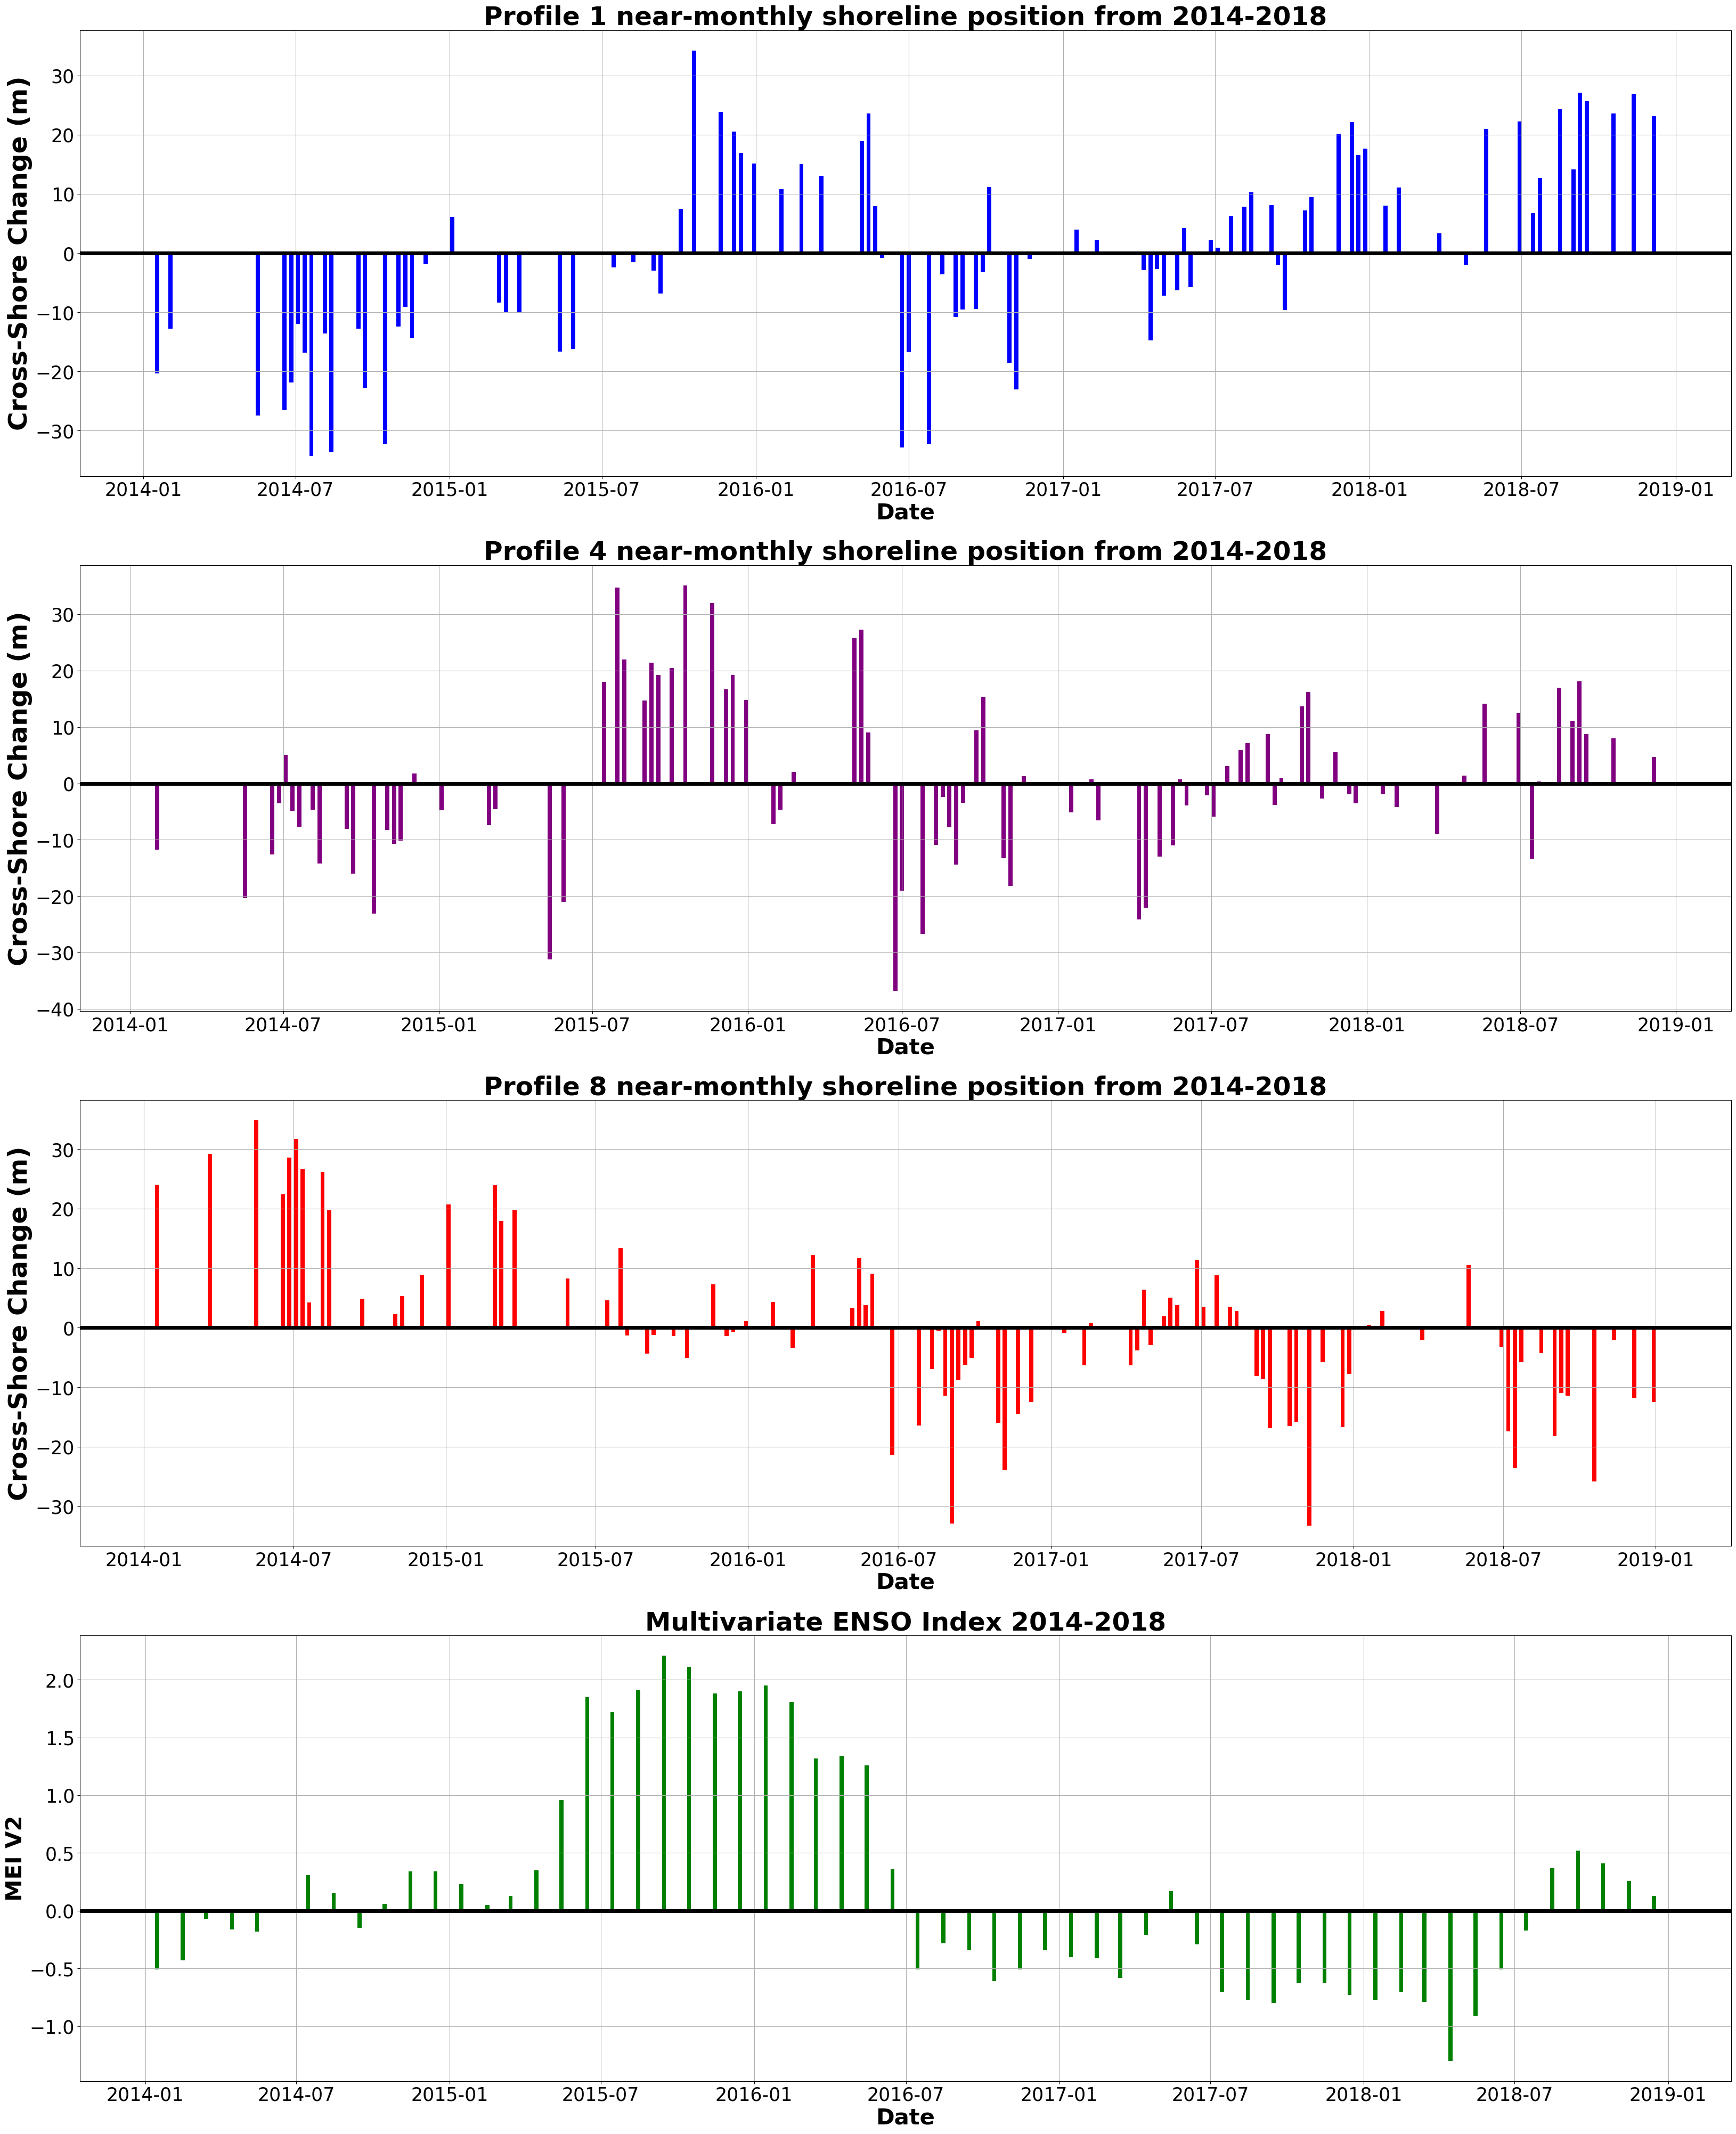

In [13]:
fig, axs = plt.subplots(4, 1, figsize=(40, 50)) #creates 3 blank stacked subplots
#creates first subplot on the top by specifing which position (0):  
axs[0].bar(annomaly1_long.index, annomaly1_long["shoreline"], width=5, color="blue") #creates a bar chart that graphs time on x and cross-shore change on y, with a larger bar width in blue for PF1
axs[0].tick_params("x", labelsize = 25) #makes the x-axis ticks be a larger size
axs[0].tick_params("y", labelsize = 25)  #makes the y-axis ticks be a larger size
axs[0].set_xlabel("Date", fontsize=30,  fontweight="bold") #sets x axis title 
axs[0].set_ylabel("Cross-Shore Change (m)", fontsize=35,  fontweight="bold") #sets y label title and size
axs[0].set_title("Profile 1 near-monthly shoreline position from 2014-2018", fontsize = 35, fontweight="bold") #sets title with size
axs[0].grid() #adds grid lines
axs[0].axhline(y = 0, color = 'black', linestyle = '-', lw=5)  #adds a line at line zero so its easier to see the moving averages
axs[0].xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1,7]))#adds anotherr tick at July every year
axs[0].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m")) #formats the way the date is on the new ticks via matplotlib.dates


#creates second subplot in the middle by specifying which position (1):  
axs[1].bar(annomaly2_long.index, annomaly2_long["shoreline"], width=5, color="purple") #creates a bar chart that graphs time on x and cross-shore change on y, with a larger bar width in blue for PF4
axs[1].tick_params("x", labelsize = 25, color="black") #makes the x-axis ticks be a larger size
axs[1].tick_params("y", labelsize = 25) #makes the y-axis ticks be a larger size
axs[1].set_ylabel("Cross-Shore Change (m)", fontsize=35,  fontweight="bold") #sets y label t
axs[1].set_xlabel("Date", fontsize=30,  fontweight="bold") #sets x axis title itle and size
axs[1].set_title("Profile 4 near-monthly shoreline position from 2014-2018", fontsize = 35,  fontweight="bold") #sets title with size
axs[1].grid() #adds grid lines
axs[1].axhline(y = 0, color = 'black', linestyle = '-', lw=5)  #adds a line at line zero so its easier to see the moving averages
axs[1].xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1,7]))#adds anotherr tick at July every year
axs[1].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m")) #formats the way the date is on the new ticks via matplotlib.dates

#creates third subplot on the bottom by specifying which position (2):  
axs[2].bar(annomaly3_long.index, annomaly3_long["shoreline"], width=5, color="red") #creates a bar chart that graphs time on x and cross-shore change on y, with a larger bar width in blue for PF8
axs[2].tick_params("x", labelsize = 25, color="black") #sets x label title and size
axs[2].set_xlabel("Date", fontsize=30, fontweight="bold") #makes the x-axis ticks be a larger size
axs[2].tick_params("y", labelsize = 25)  #sets y label title and size
axs[2].set_ylabel("Cross-Shore Change (m)", fontsize=35,  fontweight="bold") #makes the y-axis ticks be a larger size
axs[2].set_title("Profile 8 near-monthly shoreline position from 2014-2018", fontsize = 35,  fontweight="bold") #sets title with size
axs[2].grid() #adds grid lines
axs[2].axhline(y = 0, color = 'black', linestyle = '-', lw=5)  #adds a line at line zero so its easier to see the moving averages
axs[2].xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1,7]))#adds anotherr tick at July every year
axs[2].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m")) #formats the way the date is on the new ticks via matplotlib.dates


axs[3].bar(enso.index, enso["MEI V2"], color="green", width=5, label="Multivariate ENSO Index (MEI V2)") 
axs[3].set_xlabel("Date", fontsize=30,  fontweight="bold") #sets x axis title 
axs[3].set_ylabel("MEI V2", fontsize=30,  fontweight="bold") #sets y label title and size
axs[3].tick_params("x", labelsize = 25) #makes the x-axis ticks be a larger size
axs[3].tick_params("y", labelsize = 25)  #makes the y-axis ticks be a larger size
axs[3].set_title("Multivariate ENSO Index 2014-2018", fontsize = 35, fontweight="bold") #sets title with size
axs[3].grid() #adds grid lines
axs[3].axhline(y = 0, color = 'black', linestyle = '-', lw=5)  #adds a line at line zero so its easier to see the moving averages
axs[3].xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1,7]))#adds anotherr tick at July every year
axs[3].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m")) #formats the way the date is on the new ticks via matplotlib.dates


<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Figure 3 Caption:** Influence of ENSO events on shoreline erosion and accretion along the Southeast Australian coastline (2014–2018).

This figure clearly demonstrates that ENSO events have a direct impact on erosion rates along the Southeast Australian coastline, which is concerning as La Nina events are expected to become more frequent due to climate change (Barnard et al., 2015). La Nina is associated with heightened rainfall, storms, cyclonic activities, increased wave heights, and rising sea levels in SE Australia (Barnard et al. 2015). It also causes reverse southward sediment transport and an anticlockwise circulation pattern, leading to the loss of sediment at the southern ends of beaches (Ranasinghe et al., 2004). In contrast, El Nino conditions facilitate coastline accretion by promoting typical northward alongshore sediment transport and a clockwise pattern. This is proven when comparing cross-shore changes at all profiles with the ENSO plot, which reveals that La Nina events lead to significant erosion, while El Nino phases promote shoreline recovery and sediment accretion.

For example, during the 2015 El Nino event, all profiles showed sediment accretion until the June 2016 storm, when it transitioned into a La Nina phase. La Nina continued until it hit an El Nino phase in late 2017. This is reflected in the erosion observed at the beginning of 2017 across all profiles, followed by accretion in Profiles 1 and 4. Profile 8, with a lower sediment budget, was unable to recover and sustained severe damage from the double La Nina, which remained eroded even into the 2018 El Nino. In contrast, Profiles 1 and 4 accreted during the 2018 El Nino.


## 4. Long-Term Trends: 35-Years of Natural Accretion and Erosion Cycles

<!-- In the introduction below, specify the data set(s) you are working with in this section, which aspect of your research question this section addresses, and the figure you will produce -->

In this section, I will use CoastStat to plot natural shoreline change trends over a 35-year period, from 1988 to 2024, at each profile. By analyzing these long-term cycles, I aim to isolate trends in coastal erosion and accretion that occur without the direct influence of El Nino or La Nina phases. This analysis will also help identify natural accretion-erosion cycles along the Southeast Australian coastline, which will be compared against any anomalous shoreline behavior to prove how the unusual direction of the storm waves is what caused the most damage.

I had a hard time using the rolling function, and took sometime to figure out how to get it to work.

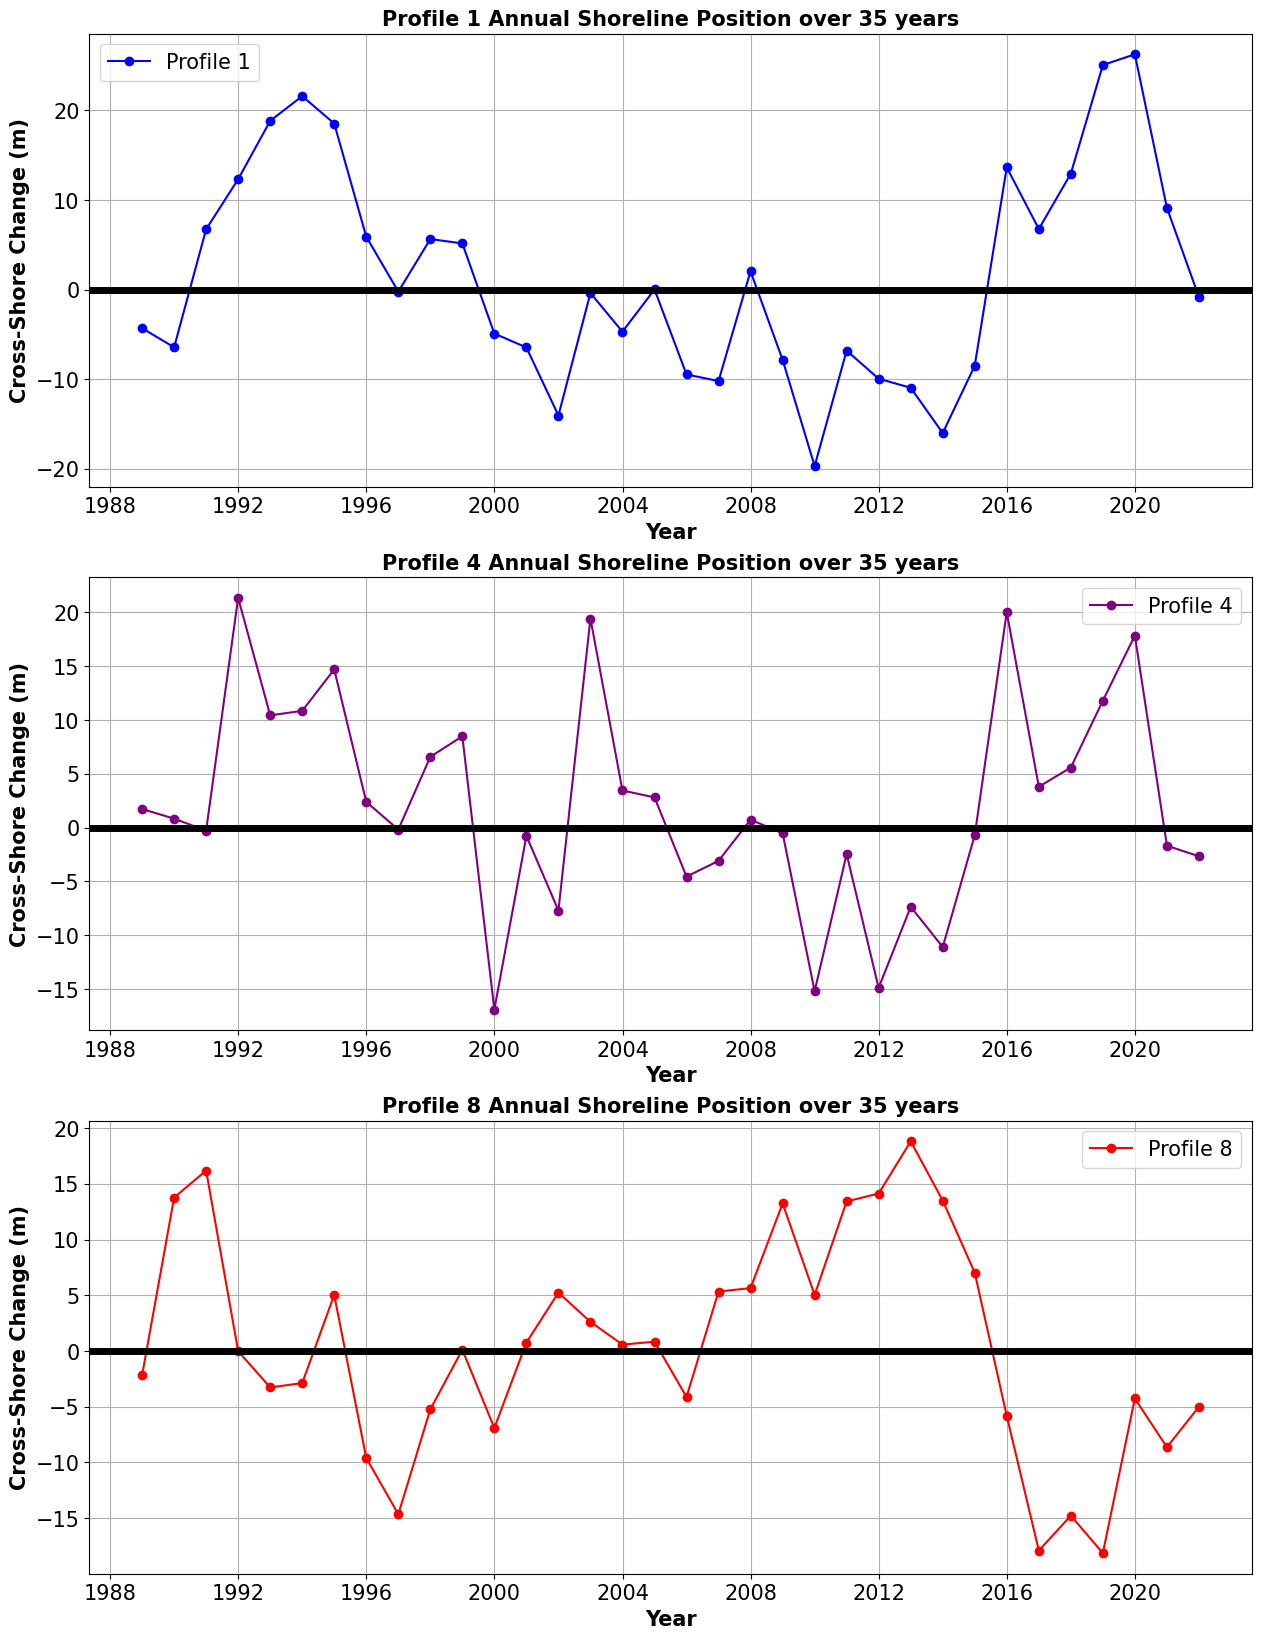

In [14]:
# Define the start and end dates for filtering
start_dateF = '1988-01-01' 
end_dateF = '2024-01-01'

# Filter the data between start_date and end_date
pf1F = pf1shoreline_file.loc[start_dateF:end_dateF]
pf4F = pf4shoreline_file.loc[start_dateF:end_dateF]
pf8F = pf8shoreline_file.loc[start_dateF:end_dateF]

# Function to calculate anomalies for each profile
def calculate_anomalies(profile_data):
    # Calculate the rolling average over 3 years (using a window size of 1095 days)
    rolling_avg = profile_data.rolling(window=1095, min_periods=1).mean()

    # Calculate the anomaly by subtracting the rolling average from the shoreline data
    anomaly = profile_data - rolling_avg

    return anomaly  #used https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html this page to help me

# Apply the function to each profile to get anomalies
annomaly1F = calculate_anomalies(pf1F)
annomaly2F = calculate_anomalies(pf4F)
annomaly3F = calculate_anomalies(pf8F)

# Optionally, you can extract anomalies for each year:
# Group by year and calculate the average anomaly for each year
annomaly1F_yearly = annomaly1F.resample('Y').mean()
annomaly2F_yearly = annomaly2F.resample('Y').mean()
annomaly3F_yearly = annomaly3F.resample('Y').mean()

#used AI to get me to figure out how to do this - 

fig, axs = plt.subplots(3, 1, figsize=(15, 20))

# Plot anomalies for Profile 1
axs[0].plot(annomaly1F_yearly.index, annomaly1F_yearly, label='Profile 1', color='blue', marker='o')#graphs x,y in blue with a Profile 1
axs[0].set_xlabel('Year', fontsize=15,  fontweight="bold")#sets x axis title 
axs[0].set_ylabel('Cross-Shore Change (m)', fontsize=15,  fontweight="bold")#sets y axis title 
axs[0].set_title('Profile 1 Annual Shoreline Position over 35 years', fontsize=15,  fontweight="bold")#sets title 
axs[0].tick_params("x", labelsize = 15) #makes the y-axis ticks be a larger size
axs[0].tick_params("y", labelsize = 15) #makes the y-axis ticks be a larger size
axs[0].legend(fontsize=15)#adds legend
axs[0].grid() #adds grid lines
axs[0].axhline(y = 0, color = 'black', linestyle = '-', lw=5)  #adds a line at line zero so its easier to see the moving averages

# Plot anomalies for Profile 4
axs[1].plot(annomaly2F_yearly.index, annomaly2F_yearly, label='Profile 4', color='purple', marker='o')#graphs x,y in purple with a Profile 4
axs[1].set_xlabel('Year', fontsize=15,  fontweight="bold")#sets x axis title 
axs[1].set_ylabel('Cross-Shore Change (m)', fontsize=15,  fontweight="bold")#sets y axis title 
axs[1].set_title('Profile 4 Annual Shoreline Position over 35 years', fontsize=15,  fontweight="bold")#sets title 
axs[1].legend(fontsize=15)#adds legend
axs[1].grid() #adds grid lines
axs[1].tick_params("x", labelsize = 15, color="black") #makes the x-axis ticks be a larger size
axs[1].tick_params("y", labelsize = 15) #makes the y-axis ticks be a larger size
axs[1].axhline(y = 0, color = 'black', linestyle = '-', lw=5)  #adds a line at line zero so its easier to see the moving averages

# Plot anomalies for Profile 8
axs[2].plot(annomaly3F_yearly.index, annomaly3F_yearly, label='Profile 8', color='red', marker='o') #graphs x,y in red with a Profile 8
axs[2].set_xlabel('Year', fontsize=15,  fontweight="bold")#sets x axis title 
axs[2].set_ylabel('Cross-Shore Change (m)', fontsize=15,  fontweight="bold")#sets y axis title 
axs[2].set_title('Profile 8 Annual Shoreline Position over 35 years', fontsize=15,  fontweight="bold")#sets title 
axs[2].legend(fontsize=15) #adds legend
axs[2].grid() #adds grid lines
axs[2].tick_params("x", labelsize = 15, color="black") #makes the x-axis ticks be a larger size
axs[2].tick_params("y", labelsize = 15) #makes the y-axis ticks be a larger size
axs[2].axhline(y = 0, color = 'black', linestyle = '-', lw=5)  #adds a line at line zero so its easier to see the moving averages


**Figure 4 Caption:** Individual beach profiles of annual shoreline position at Narrabeen from 1988 to 2023

Over the long term, Narrabeen’s northern and central profiles exhibit clear 8 to 10-year erosion and accretion cycles, with the beach returning to its original width by the end of each cycle. For example, in the north, from 1990 to 2000, the beach starts at -5 meters then accretes and fluctuates over the next 10 years, returning to -5 meters by 2000. From 2000 to 2009, it remained within 3 meters of its starting position, and from 2009 to 2015, it began at -8 meters, fluctuated, and ended at -8 meters. The central profile starts at 0 meters in 1990, accretes and erodes, returning to 0 meters by 1997. This same pattern repeats from 1997 to 2005 and from 2005 to 2015. In 2016, there was a sharp increase in accretion, followed by a steep decline in beach width loss.

The northern and central profiles experienced less decline due to higher sediment variability, whereas the southern profile was more vulnerable due to the absence of dunes to buffer erosion. The 2016 storm marked a clear decline in the beach's ability to recover. The southern profile, in particular, lacked clear cycles and showed significant sediment variability. The longest period of continuous erosion occurred between 2013 and 2017, resulting in a total loss of 36 meters. 12 meters of that loss occurred between 2016 and 2017, indicating a damaging storm. The southern profile remained in an eroded state into 2023, which is concerning.

In contrast, the northern and central profiles were able to recover, demonstrating that the presence of dunes in these areas acted as a buffer, limited erosion and increased the sediment budget, which aided recovery.



## Discussion
**Interpretation of Results:**  

Narrabeen experienced its most significant shoreline oscillation in 35 years during the 2016 storm, disrupting the natural 8-10 year accretion-erosion cycle (Figure 4). This was attributed to the embayment's shape, the beach’s eastward orientation, and a small sediment budget (Mortlock et al. 2017). The beach is typically sheltered from southeast waves (Figure 1) by a long southern reef point headland (Goodwin, Mortlock & Browning, 2016). However, during the 2016 storm, an East Coast Low brought strong eastward waves (Figure 1), reversing the normal northward sediment transport and exposing the beach to direct wave action (Mortlock et al. 2017). In contrast, the 2015 storm, with similar wave heights but from the southeast, did not cause severe erosion (Figure 2).

Figure 2 also shows that embayment geometry plays a key role in buffering erosion and facilitating recovery. The northern and central dunes acted as buffers, limiting erosion and increasing the sediment supply, letting this part of the coastline quickly recover within three months (Turner et al. 2016). In the southern section, the absence of dunes due to housing limited the sediment budget, exacerbating erosion and delaying recovery (Mortlock et al. 2017). The southern section also exhibited the highest sediment variability (Figure 4) and the greatest continuous erosion, with a total loss of 36 meters over four years (2013-2017). 12 meters of that loss occurred in 2016. Over the past 35 years, the southern coastline has struggled to maintain its position, suffering the most from eastward storm waves, and recovering more slowly than the northern and central areas (Figure 4).

ENSO, the primary climate system influencing Pacific coastlines, clearly affects erosion rates at Narrabeen. Figure 3 shows that La Nina events cause significant erosion, while El Nino conditions promote sediment accretion and coastline recovery. This is consistent with the patterns observed in 2015 and 2016: La Nina brings stronger, easterly waves that erode the coast, while El Nino's indirect southeast waves support recovery (Figure 3). Long-term beach stability depends on the infrequent, smaller waves of El Nino events to transport sediment onshore (Harley et al. 2017). However, as La Nina events are predicted to become more frequent and intense due to climate change, their increased energy and eastward wave direction pose a growing threat to coastlines (Barnard et al. 2015). This trend is concerning, especially for NSW beaches, which face east. My hypothesis is therefore supported: atypical wave direction significantly impacts erosion rates and recovery, particularly in areas with high sediment variability like Narrabeen. 


**Limitations and Future Work:**  

I have a few limitations within my work. Sydney’s offshore wave buoy data may not fully reflect the wave conditions at the coastline where the erosion or accretion occurs, as it represents offshore conditions rather than nearshore ones. This doesn't account for factors like refraction or diffraction, which can shift the wave direction slightly, and wave heights are likely to be higher nearshore as waves tend to grow in height in shallow water. Additionally, the use of monthly data to estimate yearly cross-shore changes over a 40-year period may not provide an accurate picture, as it could include excessive fluctuations that obscure long-term trends. Furthermore, the transition between La Nina and El Nino phases can be delayed, meaning that the MEI Values in Figure 3 may not fully capture the true state of the ENSO system, which could affect data interpretation.

Regardless of limitations, this study has significant implications for managing future sandy coastlines in relation to coastal hazards created from Pacific basin-scale changes. This study highlights the critical role of wave-to-coastline orientation and the importance of natural buffers. Headlands and dunes were crucial for reducing the impact of straight on waves by offering some protection and increasing the sediment budget. Therefore experimental small-scale models should be conducted to test the efficiency of artificial dunes, headlands, and other coastal structures relative to specific morphodynamic coastline features. This will provide valuable insights to sediment transport limitations across various beach types, hopefully offering a solution to protect all beaches. Future research should also focus on researching oceanographic dynamics associated with the increasing frequency for both El Nino and La Nina events and their direct impact on coastlines. 


## References  

Barnard, P. L., A. D. Short, M. D. Harley, K. D. Splinter, S. Vitousek, I. L. Turner, J. Allan, M. Banno, K. R. Bryan, A. Doria, J. E. Hansen, S. Kato, Y. Kuriyama, E. Randall-Goodwin, P. Ruggiero, I. J. Walker and D. K. Heathfield (2015). "Coastal vulnerability across the Pacific dominated by El Nino/Southern Oscillation." Nature Geosci 8(10): 801-807.

Goodwin, ID, Mortlock, TR & Browning, S 2016, ‘Tropical and extratropical‐origin storm wave types and their influence on the East Australian longshore sand transport system under a changing climate’, Journal of Geophysical Research: Oceans, vol. 121, no. 7, pp. 4833–4853.

Harley, MD, Turner, IL, Kinsela, MA, Middleton, JH, Mumford, PJ, Splinter, KD, Phillips, MS, Simmons, JA, Hanslow, DJ & Short, AD 2017, ‘Extreme coastal erosion enhanced by anomalous extratropical storm wave direction’, Scientific Reports, vol. 7, no. 1.

Mortlock, TR, Goodwin, ID, McAneney, JK & Roche, K 2017, ‘The June 2016 Australian East Coast Low: Importance of Wave Direction for Coastal Erosion Assessment’

pandas.pydata.org. (n.d.). pandas.to_numeric — pandas 1.4.2 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html.

PSL Web Team n.d., PSL : MEI.v2, psl.noaa.gov.

Turner, IL, Harley, MD, Short, AD, Simmons, JA, Bracs, MA, Phillips, MS & Splinter, KD 2016, ‘A multi-decade dataset of monthly beach profile surveys and inshore wave forcing at Narrabeen, Australia’, Scientific Data, vol. 3, p. 160024. 

Vos, K, Splinter, KD, Harley, MD, Simmons, JA & Turner, IL 2019, ‘CoastSat: A Google Earth Engine-enabled Python toolkit to extract shorelines from publicly available satellite imagery’, Environmental Modelling & Software, vol. 122, p. 104528, viewed 20 November 2019, <https://www.sciencedirect.com/science/article/pii/S1364815219300490>.